## Mass Shootings in the United States 
###### Lauren Half - December 2020

The United States has been devastated by a record-shattering loss of life due to Covid-19, with American deaths outnumbering the Vietnam, Korea, Iraq, Afghanistan, and World War I combined (https://www.democracynow.org/topics/coronavirus). But before this national tragedy we were combating others, and one of those continues to be gun violence in the form of mass shootings. While the numbers themselves may look low in relation to coronavirus deaths today, it's important to acknowledge these numbers were individuals with families, friends, and futures. 

The dataset I examined was downloaded from Gun Violence Archive's website (https://www.gunviolencearchive.org/). From the organization's description: "Gun Violence Archive (GVA) is a not for profit corporation formed in 2013 to provide free online public access to accurate information about gun-related violence in the United States. GVA will collect and check for accuracy, comprehensive information about gun-related violence in the U.S. and then post and disseminate it online." The data represents mass shootings by U.S. location from April 2016 to November 2020. Mass Shooting = 4+ victims injured or killed excluding the subject/suspect/perpetrator, one location.

## Data Overview
To use the dataset, I only needed to provide credit to and notify Gun Violence Archive. Link to terms: https://www.gunviolencearchive.org/about

It is significant to note that 46 states had mass shootings since 2017, with incidents occuring in 647 unique cities. There have been 2,000 unique mass shooting incidents in the United States since 2017 (Incident IDs) included in the dataset. Colunms include: Incident ID, Incident Date, State, City Or County, Address, # Killed, # Injured, and Operations. 

An additional contextual dataset can be found on GitHub (https://github.com/jamesqo/gun-violence-data). While the data is limited to mass shootings from January 2013 and March 2018, it could be useful in telling the final story because each entry has additional data not directly viewable from the query results page on R, specifically participant information and geolocation data.

In [5]:
%matplotlib inline
import cartopy
import pandas as pd
import matplotlib.pyplot as plt
import bqplot
import bqplot.market_map
import numpy as np
import traitlets
import ipywidgets
import matplotlib.cm as cm

In [8]:
massshootingdata = pd.read_csv("massshootingdata.csv")
msdata = pd.read_csv("msdata.csv")
msdata

,Incident ID,Incident Year,Incident Month,Incident Day,State,City Or County,Address,# Killed,# Injured,Operations
0,541996,2016,4,17,Pennsylvania,Philadelphia,600 block of Westmoreland Street,3,1,NaN
1,543102,2016,4,17,South Carolina,Pelzer,200 block of Eastview Road,1,3,NaN
2,543108,2016,4,17,Texas,Edinburg,5021 W St Hwy 107,1,6,NaN
3,543244,2016,4,18,California,Long Beach,1200 block of E. 17th Street,1,3,NaN
4,543441,2016,4,19,Alabama,Blountsville,81551 US Highway 278,1,4,NaN
...,...,...,...,...,...,...,...,...,...,...
1995,1864205,2020,11,28,South Carolina,Conway,3800 block of Golden Key Rd,0,5,NaN
1996,1863726,2020,11,28,South Carolina,Aiken,1695 Richland Ave E,1,4,NaN
1997,1864177,2020,11,28,Louisiana,New Orleans,7001 Lawrence Rd,0,4,NaN
1998,1864683,2020,11,29,Mississippi,Grenada,Highway 8 East,0,11,NaN


## Figure 1: Total number of Mass Shooting Incidents in the US Since 2017
The visualization below shows the total number of mass shooting incidents that occurred each month between 2016 and 2020.

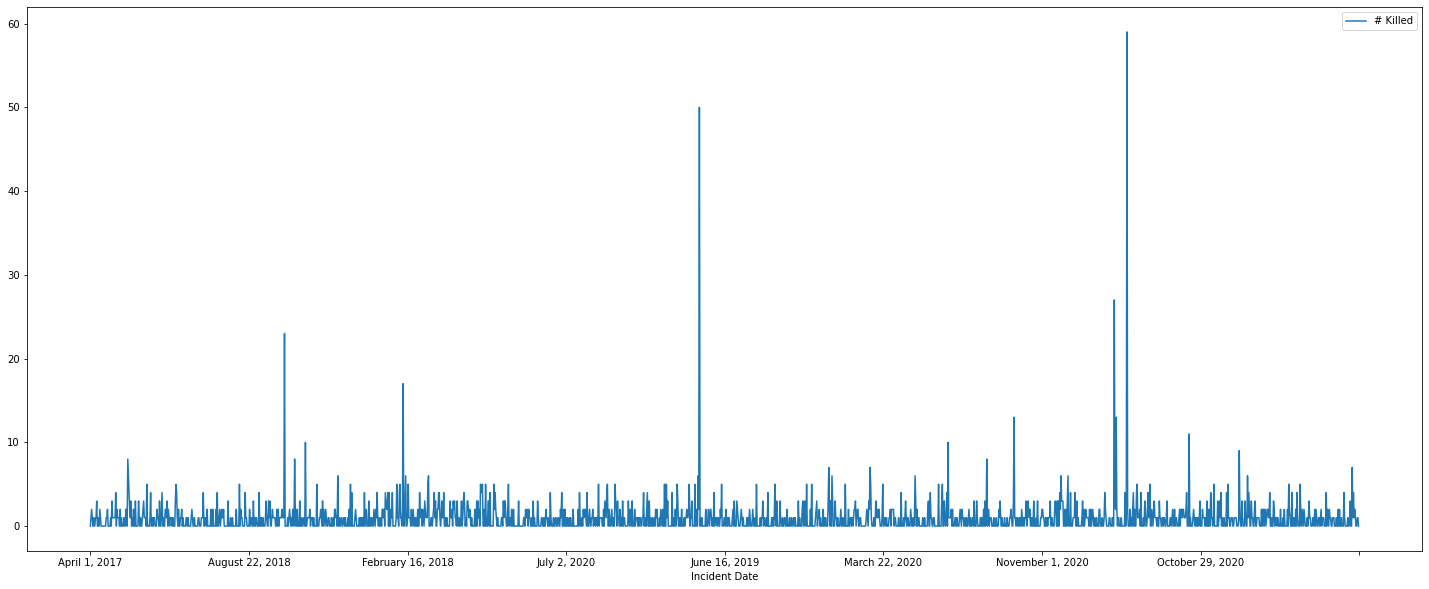

In [9]:
massshootingdata.plot(x="Incident Date", y="# Killed", figsize=(25,10))

## Figure 2: Top 10 U.S. States with the Most Total Incidents 
The bar chart below shows the top ten U.S. states that experienced the most deaths and injuries from gun violence over the full timeline: April 2016 to November 2020. 

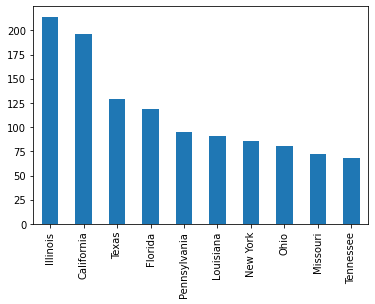

In [10]:
msdata["State"].value_counts().head(10).plot(kind="bar")

## The list below ranks states from most to least mass shooting incidents.

In [11]:
most_d = msdata.groupby("State")["# Killed"].sum()
most_d

most_d = msdata.groupby("State")["# Killed"].sum().sort_values(ascending=False)
most_d

State
Texas                   237
California              214
Florida                 180
Illinois                143
Ohio                     88
Louisiana                86
Missouri                 83
Pennsylvania             81
Nevada                   78
Georgia                  70
North Carolina           70
Alabama                  64
Maryland                 55
Michigan                 53
Mississippi              51
South Carolina           48
New Jersey               44
Tennessee                41
New York                 40
Virginia                 38
Indiana                  33
Washington               33
New Mexico               32
Colorado                 27
Kentucky                 25
Arizona                  24
Wisconsin                24
Arkansas                 19
Kansas                   18
District of Columbia     15
Massachusetts            12
Oklahoma                 11
Iowa                     10
Connecticut              10
Delaware                  8
Minnesota     

## Figure 3: Most Current Data - Interactive Visualization
Gun Violence Archive provides an interactive map with the most current data collected on gun violence: https://www.gunviolencearchive.org/query/99d3ff0d-76d2-4042-bf55-15417482432b/map The visualization allows a user to zoom from regional data down to specific incident information. 

## Figure 4: Mass Shooting Locations in 2020
Below is a map of the most current data location points from only this year (2020). It can be inferred form the map that public health measures, specifically quarantine measures, have positively (less gun violence incidents) impacted certain states- notably around the mountain time zone region. 

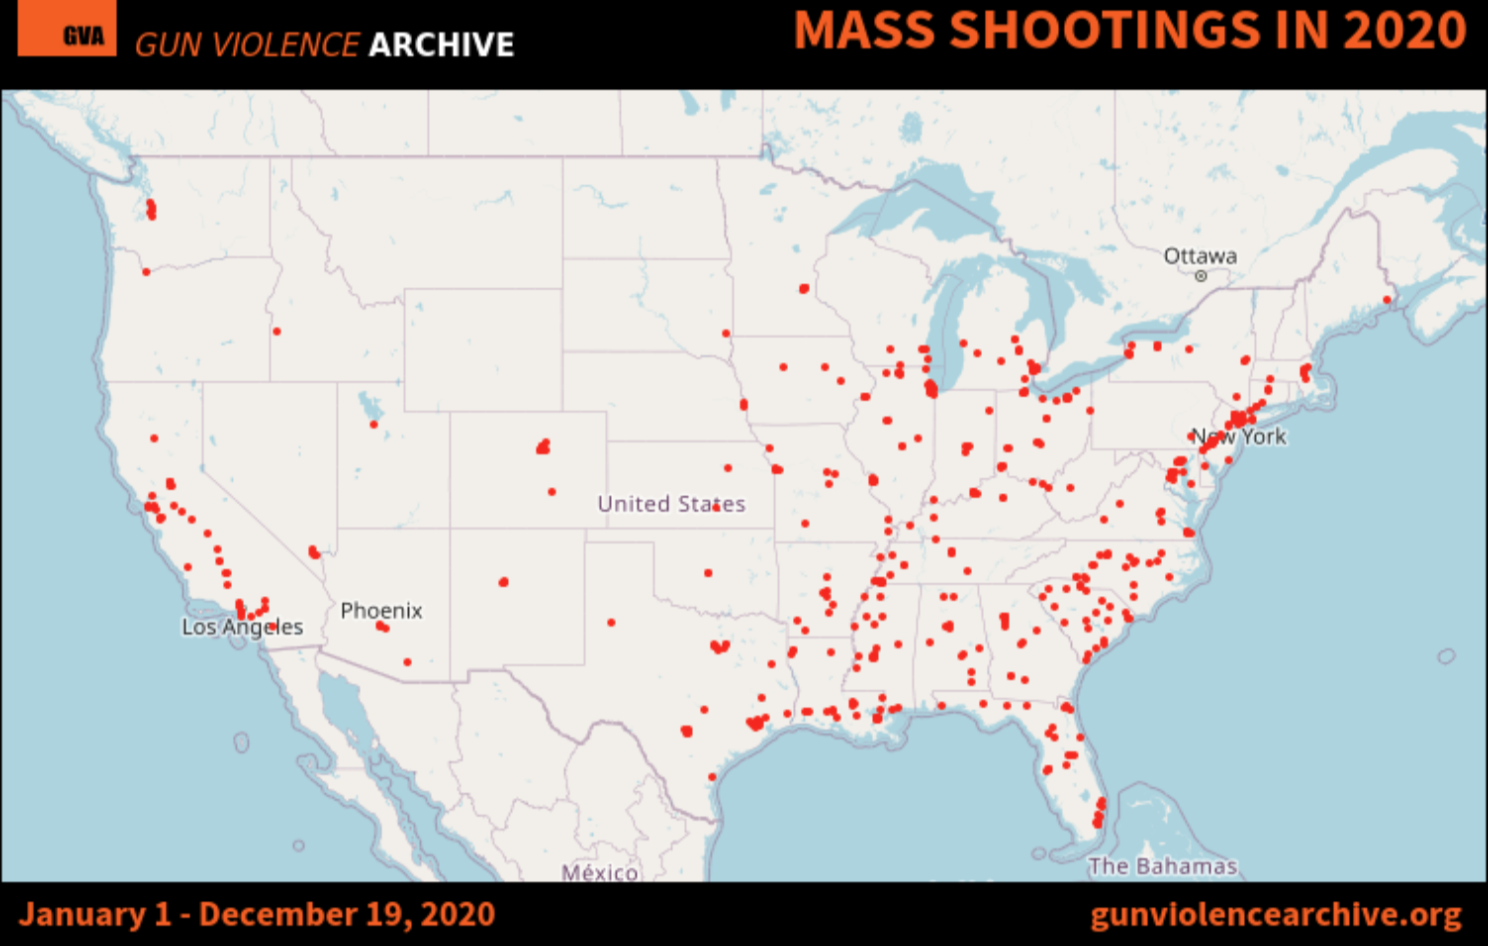

In [18]:
from IPython.display import Image 
Image(filename='2020map.png') 